## Example: Visualizing Seattle Bicycle Counts

As a more involved example of working with some time series data, let's take a look at bicycle counts on Seattle's [Fremont Bridge](http://www.openstreetmap.org/#map=17/47.64813/-122.34965).
This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge.
The hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the [direct link to the dataset](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).

As of summer 2016, the CSV can be downloaded as follows:

Once this dataset is downloaded, we can use Pandas to read the CSV output into a ``DataFrame``.
We will specify that we want the Date as an index, and we want these dates to be automatically parsed:

In [1]:
# lee los datos en un DataFrame

# https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD



,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


For convenience, we'll further process this dataset by shortening the column names:

In [2]:
# que las columnas se llamen 'Total','East', 'West'


Now let's take a look at the summary statistics for this data:

,Total,East,West
count,150878.000000,150878.000000,150878.000000
mean,109.454539,49.594885,59.859655
std,139.444543,64.153845,86.599269
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,59.000000,27.000000,30.000000
75%,144.000000,67.000000,74.000000
max,1097.000000,698.000000,850.000000


### Visualizing the data

We can gain some insight into the dataset by visualizing it.
Let's start by plotting the raw data:

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()
import pandas.util.testing as tm

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  after removing the cwd from sys.path.


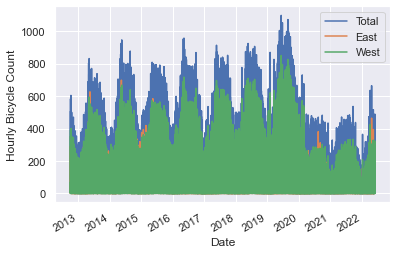

In [5]:
# haz un plot


The ~25,000 hourly samples are far too dense for us to make much sense of.
We can gain more insight by resampling the data to a coarser grid.
Let's resample by month:

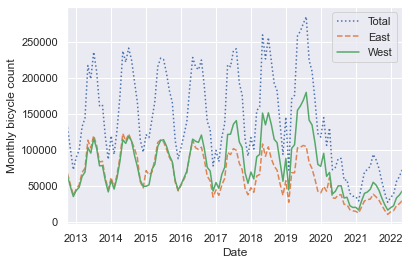

In [6]:
# muestrea por mes y en ese periodo calcula la suma
# pinta ese cálculo con puntos suspensivos para el total, rayado para el este y 
# con línea continua para el oeste



This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week (likely dependent on weather; see [In Depth: Linear Regression](05.06-Linear-Regression.ipynb) where we explore this further).

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the ``pd.rolling_mean()`` function.
Here we'll do a 30 day rolling mean of our data, making sure to center the window:

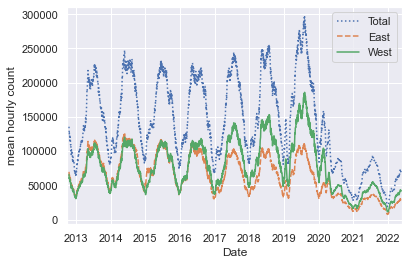

In [7]:
# haz una ventana deslizante de 30 días, calcula la suma y asóciala al centro de la ventana


The jaggedness of the result is due to the hard cutoff of the window.
We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window.
The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

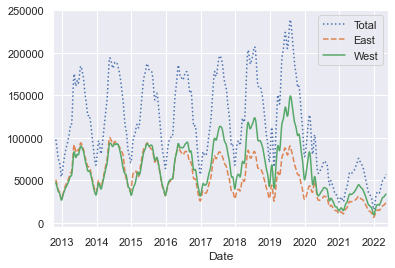

In [8]:
# usa ahora una ventana deslizante gaussiana de 50 días para suavizar más



### Digging into the data

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure.
For example, we might want to look at the average traffic as a function of the time of day.
We can do this using the GroupBy functionality discussed in [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb):

In [9]:
# agrupamos por horas y calculamos la agregación (media) calculada entre todos los días


,Total,East,West
00:00:00,10.817430,4.535305,6.282125
01:00:00,5.721215,2.538645,3.182570
02:00:00,3.759126,1.788299,1.970827
03:00:00,2.773219,1.403149,1.370070
04:00:00,6.337309,3.282602,3.055193
05:00:00,24.574427,14.750000,9.824427
06:00:00,85.551686,50.508747,35.042939
07:00:00,214.056616,131.017971,83.038645
08:00:00,302.915394,175.965490,126.949905
09:00:00,179.596564,95.801782,83.794782


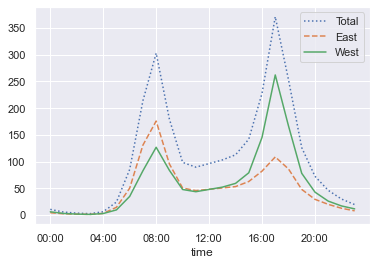

In [11]:
# mirando solo en las horas del día
# investiga qué sucede con el tráfico de bicicletas


# saltos de 4 horas, 6 puntos diferentes



In [12]:
# son las horas (time)

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening.
This is likely evidence of a strong component of commuter traffic crossing the bridge.
This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We also might be curious about how things change based on the day of the week. Again, we can do this with a simple groupby:

           Total       East       West
Date                                  
0     125.924323  55.602218  70.325368
1     134.855671  59.737841  75.117830
2     134.217323  59.494905  74.722418
3     127.438033  56.851270  70.586763
4     115.544552  51.541396  64.003156
5      65.472207  32.404278  33.067929
6      62.582485  31.474457  31.108028
            Total       East       West
Mon    125.924323  55.602218  70.325368
Tues   134.855671  59.737841  75.117830
Wed    134.217323  59.494905  74.722418
Thurs  127.438033  56.851270  70.586763
Fri    115.544552  51.541396  64.003156
Sat     65.472207  32.404278  33.067929
Sun     62.582485  31.474457  31.108028


<AxesSubplot:>

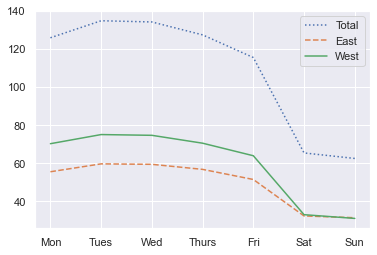

In [13]:
# agrupa ahora por día de la semana y calcula la media



This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends.
We'll start by grouping by both a flag marking the weekend, and the time of day:

In [14]:
# investiga cómo se comprota el tráfico de biciletas según el día sea fin de semana o no y la hora


array(['Weekend', 'Weekend', 'Weekday', 'Weekday', 'Weekday'], dtype='<U7')

Total        East        West
Weekday 00:00:00    8.990875    3.815046    5.175829
        01:00:00    4.458268    1.985088    2.473181
        02:00:00    2.969953    1.450256    1.519697
        03:00:00    2.555308    1.308257    1.247051
        04:00:00    7.401068    3.991320    3.410508
        05:00:00   31.521033   19.136212   12.384821
        06:00:00  113.047852   67.596483   45.451369
        07:00:00  286.722902  176.850211  109.872691
        08:00:00  400.166926  234.043846  166.123080
        09:00:00  218.503451  117.228457  101.274994
        10:00:00   97.474059   49.784012   47.690047
        11:00:00   76.183033   38.907593   37.275440
        12:00:00   79.959029   39.688043   40.270986
        13:00:00   86.302248   41.852437   44.449811
        14:00:00   98.157168   44.624666   53.532502
        15:00:00  140.107747   58.425200   81.682547
        16:00:00  265.023375   88.345058  176.678317
        17:00:00  475.153829  130.573241  344.580588
        18:00:00  320.624221  104.173642  216.450579
        19:00:00  153.812556   56.247774   97.564782
        20:00:00   85.354408   33.754007   51.600401
        21:00:00   53.293411   22.952360   30.341051
        22:00:00   33.639359   14.274043   19.365316
        23:00:00   21.006233    8.519813   12.486420
Weekend 00:00:00   15.389415    6.338162    9.051253
        01:00:00    8.882451    3.924234    4.958217
        02:00:00    5.751124    2.641573    3.109551
        03:00:00    3.318663    1.640669    1.677994
        04:00:00    3.674652    1.508635    2.166017
        05:00:00    7.186630    3.771031    3.415599
        06:00:00   16.727019    7.737047    8.989972
        07:00:00   32.168245   16.296936   15.871309
        08:00:00   59.488579   30.591643   28.896936
        09:00:00   82.253482   42.193315   40.060167
        10:00:00  101.675766   53.050696   48.625070
        11:00:00  123.633983   63.379944   60.254039
        12:00:00  137.657939   69.873538   67.784401
        13:00:00  145.581058   73.389415   72.191643
        14:00:00  149.584401   75.427298   74.157103
        15:00:00  147.324234   74.172702   73.151532
        16:00:00  134.521448   67.197214   67.324234
        17:00:00  110.491365   54.542618   55.948747
        18:00:00   84.582173   41.832312   42.749861
        19:00:00   57.662953   27.822841   29.840111
        20:00:00   40.986630   19.206128   21.780501
        21:00:00   29.389972   13.318106   16.071866
        22:00:00   21.524234    9.564345   11.959889
        23:00:00   16.744290    6.889694    9.854596

Now we'll use some of the Matplotlib tools described in [Multiple Subplots](04.08-Multiple-Subplots.ipynb) to plot two panels side by side:

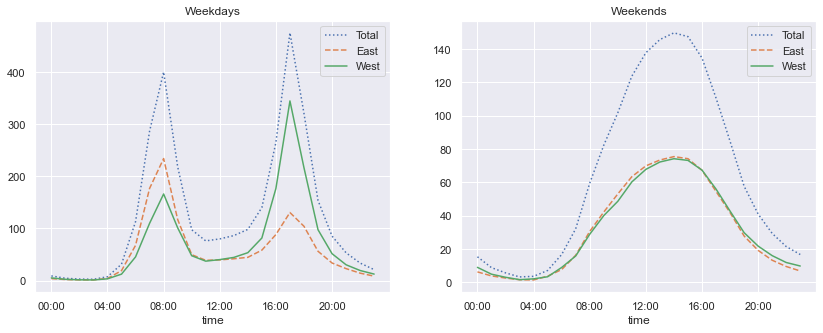

In [16]:
# pinta gráficas para ver el resultado más claro


The result is very interesting: we see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends.
It would be interesting to dig through this data in more detail, and examine the effect of weather, temperature, time of year, and other factors on people's commuting patterns; for further discussion, see my blog post ["Is Seattle Really Seeing an Uptick In Cycling?"](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/), which uses a subset of this data.
We will also revisit this dataset in the context of modeling in [In Depth: Linear Regression](05.06-Linear-Regression.ipynb).